## t-SNE를 이용한 매니폴드 학습

In [1]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
# labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data['labels'] = labels #pd.concat([data, labels],axis=1)

data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
feature = data[['Sepal length','Sepal width','Petal length','Petal width']]
feature.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


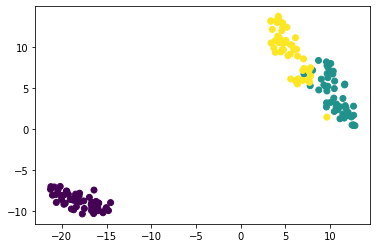

In [3]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100) # default 200
transformed = model.fit_transform(feature)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=labels)
plt.show()

### scikit-learn의 손글씨 데이터셋(MINST 아님), 8x8 크기의 흑백 이미지

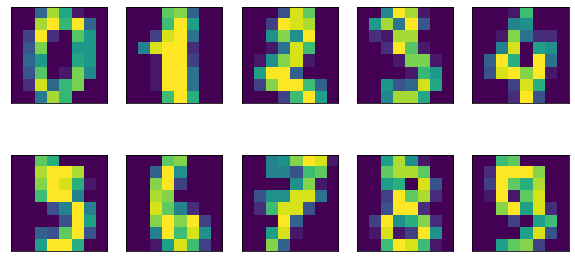

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, 'Second PCA')

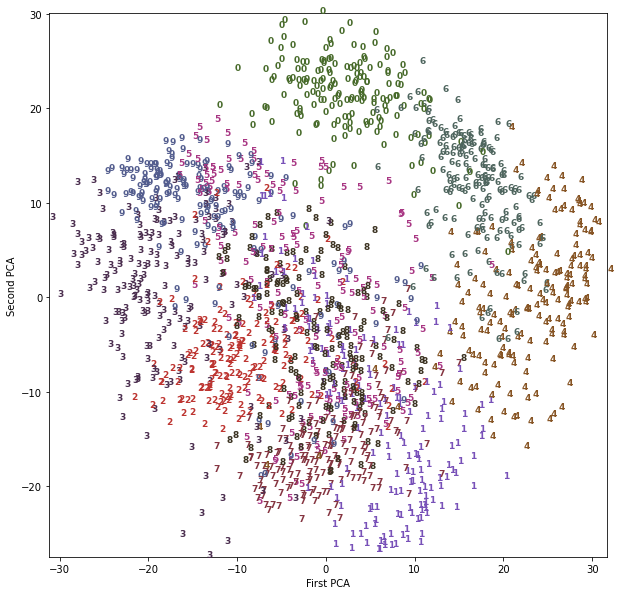

In [5]:
# PCA 모델을 생성합니다
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(digits.data)
# 처음 두 개의 주성분으로 숫자 데이터를 변환합니다
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First PCA")
plt.ylabel("Second PCA")

In [6]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# TSNE에는 transform 메소드가 없으므로 대신 fit_transform을 사용합니다
digits_tsne = tsne.fit_transform(digits.data)

In [7]:
print(digits_tsne)

[[ 65.25366     -0.32000518]
 [-21.453482    -5.3581433 ]
 [ -8.7417555   25.999811  ]
 ...
 [ -2.0523312   12.874825  ]
 [ 22.51551      1.8641503 ]
 [  0.13101313  15.256716  ]]


Text(0, 0.5, 't-Feature Feature 1')

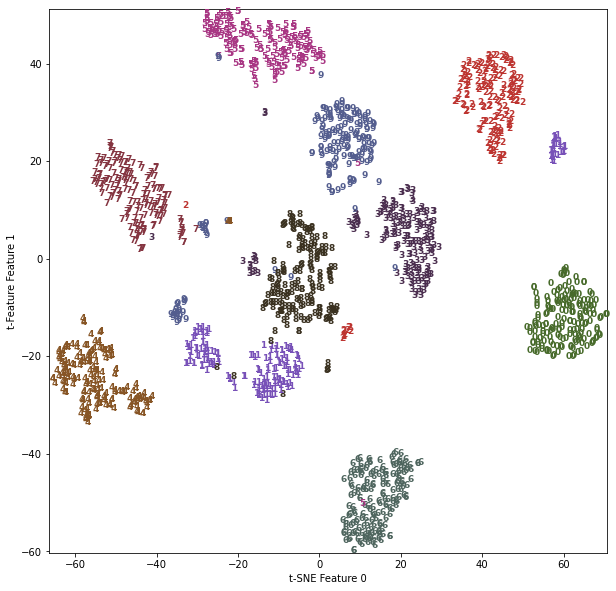

In [9]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE Feature 0")
plt.ylabel("t-Feature Feature 1")